## **셀프주유소는 정말 저렴할까**
selenium의 webdriver 이용

### **01.서울시 구별 주유소 가격 정보 얻기**

In [1]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome('chromedriver')
driver.get("http://www.opinet.co.kr")
driver.get("http://www.opinet.co.kr/searRgSelect.do") # web open with chrome

In [3]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")

In [4]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [5]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])

In [6]:
xpath = """//*[@id="searRgSelect"]"""
element_sel_gu = driver.find_element_by_xpath(xpath).click() # 조회 버튼 누르기

In [7]:
xpath = """//*[@id="glopopd_excel"]"""
element_get_excel = driver.find_element_by_xpath(xpath).click() # 엑셀저장 버튼 누르기

In [8]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names): # 구 하나씩, 조회 버튼 -> 엑셀저장 버튼 동작해서 data 뽑기
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

<ipython-input-8-b16a58a83623>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names): # 구 하나씩 조회 버튼 -> 엑셀저장 버튼 동작해서 data 뽑기


In [8]:
driver = webdriver.Chrome('chromedriver')
driver.get("http://www.opinet.co.kr")

In [9]:
driver.close() # chrome 종료

### **02.구별 주유 가격 데이터 정리**
**glob**: 파일들의 리스트를 뽑을 때 사용  
인자로 받은 패턴과 이름이 일치하는 모든 파일과 디렉터리의 리스트를 반환, 사용: glob()

In [10]:
import pandas as pd
from glob import glob

In [11]:
glob('지역_위치별(주유소)*xls') # selenium으로 다운받아놓은 file이용

['지역_위치별(주유소) (1).xls',
 '지역_위치별(주유소) (10).xls',
 '지역_위치별(주유소) (11).xls',
 '지역_위치별(주유소) (2).xls',
 '지역_위치별(주유소) (3).xls',
 '지역_위치별(주유소) (4).xls',
 '지역_위치별(주유소) (5).xls',
 '지역_위치별(주유소) (6).xls',
 '지역_위치별(주유소) (7).xls',
 '지역_위치별(주유소) (8).xls',
 '지역_위치별(주유소) (9).xls',
 '지역_위치별(주유소).xls']

In [12]:
stations_files = glob('지역_위치별(주유소)*xls')
stations_files

['지역_위치별(주유소) (1).xls',
 '지역_위치별(주유소) (10).xls',
 '지역_위치별(주유소) (11).xls',
 '지역_위치별(주유소) (2).xls',
 '지역_위치별(주유소) (3).xls',
 '지역_위치별(주유소) (4).xls',
 '지역_위치별(주유소) (5).xls',
 '지역_위치별(주유소) (6).xls',
 '지역_위치별(주유소) (7).xls',
 '지역_위치별(주유소) (8).xls',
 '지역_위치별(주유소) (9).xls',
 '지역_위치별(주유소).xls']

In [13]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2) # 3번째 row 가 컬럼명이고 데이터는 4번째 row 부터 시작이기 때문에 header=2 옵션
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [14]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 39
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      272 non-null    object
 1   상호      272 non-null    object
 2   주소      272 non-null    object
 3   상표      272 non-null    object
 4   전화번호    272 non-null    object
 5   셀프여부    272 non-null    object
 6   고급휘발유   272 non-null    object
 7   휘발유     272 non-null    object
 8   경유      272 non-null    object
 9   실내등유    272 non-null    object
dtypes: object(10)
memory usage: 23.4+ KB


In [15]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1545,1345,-
1,서울특별시,지에스칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,GS칼텍스,02-2226-4963,Y,-,1555,1355,-
2,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,1721,1563,1354,-
3,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1731,1573,1364,-
4,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1577,1379,-


In [16]:
# 휘발류 정보만 필요하니까 data 정리
stations = pd.DataFrame({'Oil_store':station_raw['상호'], 
                                       '주소':station_raw['주소'],
                                       '가격':station_raw['휘발유'],
                                       '셀프':station_raw['셀프여부'],
                                       '상표':station_raw['상표']  })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1545,Y,SK에너지
1,지에스칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,1555,Y,GS칼텍스
2,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1563,Y,SK에너지
3,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1573,Y,현대오일뱅크
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1577,Y,GS칼텍스


In [17]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']] # 주소에서 구 정보 추출
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1545,Y,SK에너지,강남구
1,지에스칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,1555,Y,GS칼텍스,강남구
2,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1563,Y,SK에너지,강남구
3,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1573,Y,현대오일뱅크,강남구
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1577,Y,GS칼텍스,강남구


In [18]:
stations['구'].unique()

array(['강남구', '중구', '중랑구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구',
       '은평구', '종로구'], dtype=object)

In [19]:
stations[stations['가격']=='-'] # 가격이 나와있지 않은 경우를 제외하기 위해 가격을 - 로 하는 row 를 확인

,Oil_store,주소,가격,셀프,상표,구
38,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
39,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
10,에스씨(주) 역전주유소,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
28,현대오일뱅크㈜직영 대일셀프주유소,서울 영등포구 영등포로 168,-,Y,현대오일뱅크,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
38,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
39,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


In [20]:
stations = stations[stations['가격'] != '-'] # 가격 다시 입력
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1545,Y,SK에너지,강남구
1,지에스칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,1555,Y,GS칼텍스,강남구
2,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1563,Y,SK에너지,강남구
3,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1573,Y,현대오일뱅크,강남구
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1577,Y,GS칼텍스,강남구


In [21]:
stations['가격'] = [float(value) for value in stations['가격']] # 가격 type: int -> float

In [22]:
stations.reset_index(inplace=True)
del stations['index']

In [23]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  265 non-null    object 
 1   주소         265 non-null    object 
 2   가격         265 non-null    float64
 3   셀프         265 non-null    object 
 4   상표         265 non-null    object 
 5   구          265 non-null    object 
dtypes: float64(1), object(5)
memory usage: 12.5+ KB


In [24]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1545.0,Y,SK에너지,강남구
1,지에스칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,1555.0,Y,GS칼텍스,강남구
2,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1563.0,Y,SK에너지,강남구
3,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1573.0,Y,현대오일뱅크,강남구
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1577.0,Y,GS칼텍스,강남구


### **03.셀프 주유소는 정말 저렴한지 boxplot으로 확인**

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')

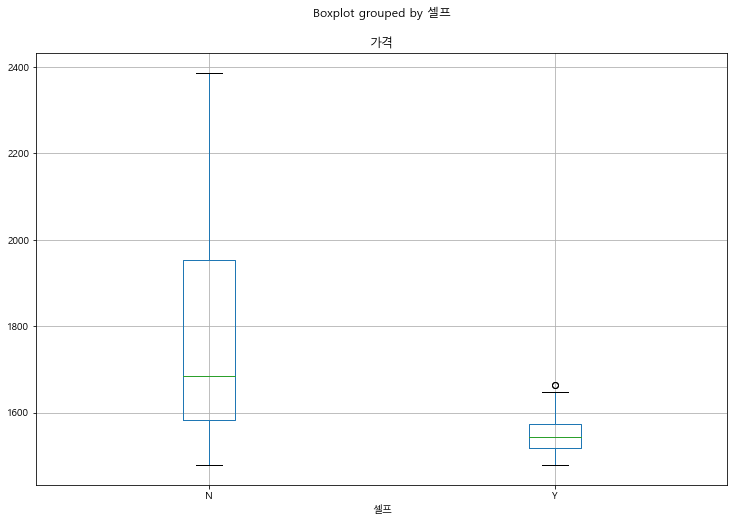

In [27]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8)); # pandas 기본 지원되는 boxplot

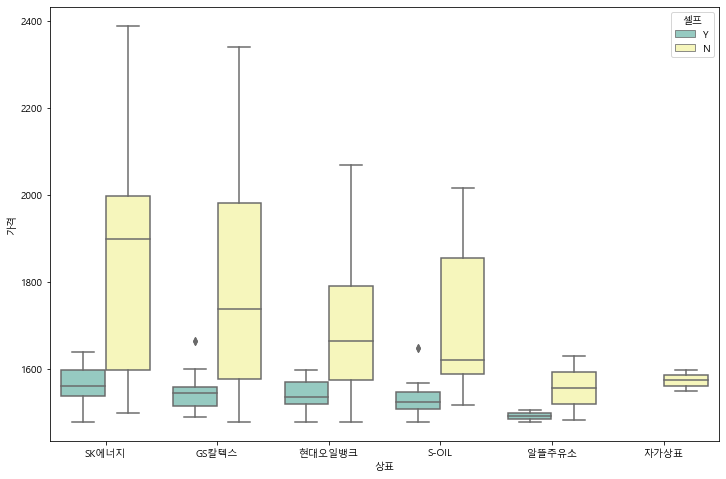

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3") # seaborn의 boxplot 메소드
plt.show()

**Self 인 경우 아닌 경우에 비해 낮은 가격임 확인 됨**

### **04.서울시 구별 주유 가격 확인**

In [29]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [30]:
stations.sort_values(by='가격', ascending=False).head(10) # 가격 내림차순 sorting

,Oil_store,주소,가격,셀프,상표,구
47,서남주유소,서울 중구 통일로 30,2387.0,N,SK에너지,중구
201,서계주유소,서울 용산구 청파로 367 (서계동),2339.0,N,GS칼텍스,용산구
46,필동주유소,서울 중구 퇴계로 196 (필동2가),2229.0,N,GS칼텍스,중구
45,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2219.0,N,SK에너지,중구
264,뉴서울(강남),서울 강남구 언주로 716,2175.0,N,SK에너지,강남구
37,뉴서울(강남),서울 강남구 언주로 716,2175.0,N,SK에너지,강남구
44,약수주유소,서울 중구 다산로 173,2107.0,N,GS칼텍스,중구
226,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2098.0,N,GS칼텍스,종로구
200,한남지점,서울 용산구 한남대로21길 4 (한남동),2098.0,N,SK에너지,용산구
199,에너비스,서울 용산구 한남대로 82 (한남동),2098.0,N,SK에너지,용산구


In [31]:
stations.sort_values(by='가격', ascending=True).head(10) # 오름차순

,Oil_store,주소,가격,셀프,상표,구
163,도림주유소,서울 영등포구 도림로 343 (도림동),1478.0,Y,알뜰주유소,영등포구
161,(주)MS주유소,서울 영등포구 대림로 230,1478.0,N,현대오일뱅크,영등포구
162,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1478.0,Y,SK에너지,영등포구
164,영등포제일셀프주유소,서울 영등포구 가마산로 379,1478.0,Y,현대오일뱅크,영등포구
165,(주)강서오일,서울 영등포구 도신로 151,1478.0,N,현대오일뱅크,영등포구
166,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1478.0,N,GS칼텍스,영등포구
167,성락주유소,서울 영등포구 가마산로 414 (신길동),1478.0,Y,S-OIL,영등포구
135,현대주유소,서울 양천구 남부순환로 372 (신월동),1479.0,Y,S-OIL,양천구
80,원천주유소,서울 성북구 돌곶이로 142 (장위동),1483.0,N,알뜰주유소,성북구
49,면목SELF주유소,서울 중랑구 동일로 627 (면목동),1487.0,Y,SK에너지,중랑구


**pivot**

In [32]:
import numpy as np

gu_data = pd.pivot_table(stations, index=["구"], values=["가격"], aggfunc=np.mean) # 구 별 평균값 확인
gu_data.head()

,가격
구,
강남구,1735.473684
성동구,1643.764706
성북구,1527.208333
송파구,1573.064516
양천구,1557.730769


In [33]:
geo_path = '02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map

folium data 항목에 gu_data 를 넣어주면,  
gu_data의 index인 구 이름을 folium 내부에서 key 로 인식하여 해당 지역의 영역에 gu_data의 값을 전달

### **05.서울시 주유 가격 상하위 10개 주유소 지도에 표기**

In [34]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
47,서남주유소,서울 중구 통일로 30,2387.0,N,SK에너지,중구
201,서계주유소,서울 용산구 청파로 367 (서계동),2339.0,N,GS칼텍스,용산구
46,필동주유소,서울 중구 퇴계로 196 (필동2가),2229.0,N,GS칼텍스,중구
45,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2219.0,N,SK에너지,중구
264,뉴서울(강남),서울 강남구 언주로 716,2175.0,N,SK에너지,강남구
37,뉴서울(강남),서울 강남구 언주로 716,2175.0,N,SK에너지,강남구
44,약수주유소,서울 중구 다산로 173,2107.0,N,GS칼텍스,중구
226,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2098.0,N,GS칼텍스,종로구
200,한남지점,서울 용산구 한남대로21길 4 (한남동),2098.0,N,SK에너지,용산구
199,에너비스,서울 용산구 한남대로 82 (한남동),2098.0,N,SK에너지,용산구


In [35]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
163,도림주유소,서울 영등포구 도림로 343 (도림동),1478.0,Y,알뜰주유소,영등포구
161,(주)MS주유소,서울 영등포구 대림로 230,1478.0,N,현대오일뱅크,영등포구
162,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1478.0,Y,SK에너지,영등포구
164,영등포제일셀프주유소,서울 영등포구 가마산로 379,1478.0,Y,현대오일뱅크,영등포구
165,(주)강서오일,서울 영등포구 도신로 151,1478.0,N,현대오일뱅크,영등포구
166,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1478.0,N,GS칼텍스,영등포구
167,성락주유소,서울 영등포구 가마산로 414 (신길동),1478.0,Y,S-OIL,영등포구
135,현대주유소,서울 양천구 남부순환로 372 (신월동),1479.0,Y,S-OIL,양천구
80,원천주유소,서울 성북구 돌곶이로 142 (장위동),1483.0,N,알뜰주유소,성북구
49,면목SELF주유소,서울 중랑구 동일로 627 (면목동),1487.0,Y,SK에너지,중랑구


In [36]:
gmap_key = " ************************************* " # 자신의 key 입력
gmaps = googlemaps.Client(key=gmap_key)

In [37]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

<ipython-input-37-ee41e38e94a3>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(oil_price_top10.index):


,Oil_store,주소,가격,셀프,상표,구,lat,lng
47,서남주유소,서울 중구 통일로 30,2387.0,N,SK에너지,중구,37.558348,126.972090
201,서계주유소,서울 용산구 청파로 367 (서계동),2339.0,N,GS칼텍스,용산구,37.552290,126.968935
46,필동주유소,서울 중구 퇴계로 196 (필동2가),2229.0,N,GS칼텍스,중구,37.560850,126.993653
45,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2219.0,N,SK에너지,중구,37.561648,126.997142
264,뉴서울(강남),서울 강남구 언주로 716,2175.0,N,SK에너지,강남구,37.517636,127.035756
37,뉴서울(강남),서울 강남구 언주로 716,2175.0,N,SK에너지,강남구,37.517636,127.035756
44,약수주유소,서울 중구 다산로 173,2107.0,N,GS칼텍스,중구,37.559009,127.012663
226,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2098.0,N,GS칼텍스,종로구,37.574464,126.966618
200,한남지점,서울 용산구 한남대로21길 4 (한남동),2098.0,N,SK에너지,용산구,37.534657,127.006063
199,에너비스,서울 용산구 한남대로 82 (한남동),2098.0,N,SK에너지,용산구,37.535952,127.006130


In [38]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = oil_price_bottom10['주소'][n].split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0]['geometry']
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
    
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

<ipython-input-38-fb94be75536d>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(oil_price_bottom10.index):


,Oil_store,주소,가격,셀프,상표,구,lat,lng
163,도림주유소,서울 영등포구 도림로 343 (도림동),1478.0,Y,알뜰주유소,영등포구,37.507656,126.900191
161,(주)MS주유소,서울 영등포구 대림로 230,1478.0,N,현대오일뱅크,영등포구,37.501330,126.897403
162,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1478.0,Y,SK에너지,영등포구,37.501567,126.898791
164,영등포제일셀프주유소,서울 영등포구 가마산로 379,1478.0,Y,현대오일뱅크,영등포구,37.502362,126.899452
165,(주)강서오일,서울 영등포구 도신로 151,1478.0,N,현대오일뱅크,영등포구,37.509969,126.908231
166,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1478.0,N,GS칼텍스,영등포구,37.498556,126.895791
167,성락주유소,서울 영등포구 가마산로 414 (신길동),1478.0,Y,S-OIL,영등포구,37.503750,126.902823
135,현대주유소,서울 양천구 남부순환로 372 (신월동),1479.0,Y,S-OIL,양천구,37.533811,126.829240
80,원천주유소,서울 성북구 돌곶이로 142 (장위동),1483.0,N,알뜰주유소,성북구,37.614921,127.052752
49,면목SELF주유소,서울 중랑구 동일로 627 (면목동),1487.0,Y,SK에너지,중랑구,37.586302,127.079512


In [39]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5) # 대충 서울 중앙으로 잡아서

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', # 비싸니까 빨강
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', # 싸니까 파랑
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map